# MLB Statistics Database
In this project we're going to design and create an SQLite database using detailed statistics of thousands of Major League Baseball games from the 1800s through to today. The files we'll be compiling our database from include:
- game_log.csv: this file includes the main body of the data, with dozens of columns detailing where and when the game took place, who won, who scored, who played, who were the umpires, whether the game was protested or forfeited or completed at a later date, etc.
- park_codes.csv: this file includes details on all the ballparks. 
- person_codes.csv: this file includes details on all the players, managers, coaches and umpires. 
- team_codes.csv: this file includes details on all the teams. 

In [1]:
import pandas as pd

In [2]:
pd.set_option('max_columns', 180)
pd.set_option('max_rows', 200000)
pd.set_option('max_colwidth', 5000)

In [3]:
game_log = pd.read_csv("game_log.csv",low_memory=False)
park_codes = pd.read_csv("park_codes.csv",low_memory=False)
person_codes = pd.read_csv("person_codes.csv",low_memory=False)
team_codes = pd.read_csv("team_codes.csv",low_memory=False)

## Exploratory data analysis

##### game_log.csv

In [4]:
game_log.shape

(171907, 161)

In [5]:
game_log.head()

,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,h_score,length_outs,day_night,completion,forefeit,protest,park_id,attendance,length_minutes,v_line_score,h_line_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional_walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_wild_pitches,v_balks,v_putouts,v_assists,v_errors,v_passed_balls,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_rbi,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional_walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_wild_pitches,h_balks,h_putouts,h_assists,h_errors,h_passed_balls,h_double_plays,h_triple_plays,hp_umpire_id,hp_umpire_name,1b_umpire_id,1b_umpire_name,2b_umpire_id,2b_umpire_name,3b_umpire_id,3b_umpire_name,lf_umpire_id,lf_umpire_name,rf_umpire_id,rf_umpire_name,v_manager_id,v_manager_name,h_manager_id,h_manager_name,winning_pitcher_id,winning_pitcher_name,losing_pitcher_id,losing_pitcher_name,saving_pitcher_id,saving_pitcher_name,winning_rbi_batter_id,winning_rbi_batter_id_name,v_starting_pitcher_id,v_starting_pitcher_name,h_starting_pitcher_id,h_starting_pitcher_name,v_player_1_id,v_player_1_name,v_player_1_def_pos,v_player_2_id,v_player_2_name,v_player_2_def_pos,v_player_3_id,v_player_3_name,v_player_3_def_pos,v_player_4_id,v_player_4_name,v_player_4_def_pos,v_player_5_id,v_player_5_name,v_player_5_def_pos,v_player_6_id,v_player_6_name,v_player_6_def_pos,v_player_7_id,v_player_7_name,v_player_7_def_pos,v_player_8_id,v_player_8_name,v_player_8_def_pos,v_player_9_id,v_player_9_name,v_player_9_def_pos,h_player_1_id,h_player_1_name,h_player_1_def_pos,h_player_2_id,h_player_2_name,h_player_2_def_pos,h_player_3_id,h_player_3_name,h_player_3_def_pos,h_player_4_id,h_player_4_name,h_player_4_def_pos,h_player_5_id,h_player_5_name,h_player_5_def_pos,h_player_6_id,h_player_6_name,h_player_6_def_pos,h_player_7_id,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
0,18710504,0,Thu,CL1,NaN,1,FW1,NaN,1,0,2,54.0,D,NaN,NaN,NaN,FOR01,200.0,120.0,000000000,010010000,30.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,6.0,1.0,NaN,-1.0,NaN,4.0,1.0,1.0,1.0,0.0,0.0,27.0,9.0,0.0,3.0,0.0,0.0,31.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,NaN,-1.0,NaN,3.0,1.0,0.0,0.0,0.0,0.0,27.0,3.0,3.0,1.0,1.0,0.0,boakj901,John Boake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,paboc101,Charlie Pabor,lennb101,Bill Lennon,mathb101,Bobby Mathews,prata101,Al Pratt,NaN,NaN,NaN,NaN,prata101,Al Pratt,mathb101,Bobby Mathews,whitd102,Deacon White,2.0,kimbg101,Gene Kimball,4.0,paboc101,Charlie Pabor,7.0,allia101,Art Allison,8.0,white104,Elmer White,9.0,prata101,Al Pratt,1.0,sutte101,Ezra Sutton,5.0,carlj102,Jim Carleton,3.0,bassj101,John Bass,6.0,selmf101,Frank Sellman,5.0,mathb101,Bobby Mathews,1.0,foraj101,Jim Foran,3.0,goldw101,Wally Goldsmith,6.0,lennb101,Bill Lennon,2.0,caret101,Tom Carey,4.0,mince101,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,NaN,Y
1,18710505,0,Fri,BS1,NaN,1,WS3,NaN,1,20,18,54.0,D,NaN,NaN,NaN,WAS01,5000.0,145.0,107000435,640113030,41.0,13.0,1.0,2.0,0.0,13.0,0.0,0.0,0.0,18.0,NaN,5.0,3.0,NaN,-1.0,NaN,12.0,1.0,6.0,6.0,1.0,0.0,27.0,13.0,10.0,1.0,2.0,0.0,49.0,14.0,2.0,0.0,0.0,11.0,0.0,0.0,0.0,10.0,NaN,2.0,1.0,NaN,-1.0,NaN,14.0,1.0,7.0,7.0,0.0,0.0,27.0,20.0,10.0,2.0,3.0,0.0,dobsh901,Henry Dobson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wrigh101,Harry Wright,younn801,Nick Young,spala101,Al Spalding,braia102,Asa Brainard,NaN,NaN,NaN,NaN,spala101,Al Spalding,braia102,Asa Brainard,wrigg101,George Wright,6.0,barnr102,Ross

In [6]:
game_log.tail()

,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,h_score,length_outs,day_night,completion,forefeit,protest,park_id,attendance,length_minutes,v_line_score,h_line_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional_walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_wild_pitches,v_balks,v_putouts,v_assists,v_errors,v_passed_balls,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_rbi,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional_walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_wild_pitches,h_balks,h_putouts,h_assists,h_errors,h_passed_balls,h_double_plays,h_triple_plays,hp_umpire_id,hp_umpire_name,1b_umpire_id,1b_umpire_name,2b_umpire_id,2b_umpire_name,3b_umpire_id,3b_umpire_name,lf_umpire_id,lf_umpire_name,rf_umpire_id,rf_umpire_name,v_manager_id,v_manager_name,h_manager_id,h_manager_name,winning_pitcher_id,winning_pitcher_name,losing_pitcher_id,losing_pitcher_name,saving_pitcher_id,saving_pitcher_name,winning_rbi_batter_id,winning_rbi_batter_id_name,v_starting_pitcher_id,v_starting_pitcher_name,h_starting_pitcher_id,h_starting_pitcher_name,v_player_1_id,v_player_1_name,v_player_1_def_pos,v_player_2_id,v_player_2_name,v_player_2_def_pos,v_player_3_id,v_player_3_name,v_player_3_def_pos,v_player_4_id,v_player_4_name,v_player_4_def_pos,v_player_5_id,v_player_5_name,v_player_5_def_pos,v_player_6_id,v_player_6_name,v_player_6_def_pos,v_player_7_id,v_player_7_name,v_player_7_def_pos,v_player_8_id,v_player_8_name,v_player_8_def_pos,v_player_9_id,v_player_9_name,v_player_9_def_pos,h_player_1_id,h_player_1_name,h_player_1_def_pos,h_player_2_id,h_player_2_name,h_player_2_def_pos,h_player_3_id,h_player_3_name,h_player_3_def_pos,h_player_4_id,h_player_4_name,h_player_4_def_pos,h_player_5_id,h_player_5_name,h_player_5_def_pos,h_player_6_id,h_player_6_name,h_player_6_def_pos,h_player_7_id,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
171902,20161002,0,Sun,MIL,NL,162,COL,NL,162,6,4,60.0,D,NaN,NaN,NaN,DEN02,27762.0,203.0,0200000202,1100100010,39.0,10.0,4.0,1.0,2.0,6.0,0.0,0.0,1.0,4.0,0.0,12.0,2.0,1.0,0.0,0.0,8.0,7.0,4.0,4.0,1.0,0.0,30.0,12.0,1.0,0.0,0.0,0.0,41.0,13.0,4.0,0.0,1.0,4.0,1.0,0.0,1.0,3.0,0.0,11.0,0.0,1.0,0.0,0.0,12.0,5.0,6.0,6.0,0.0,0.0,30.0,13.0,0.0,0.0,0.0,0.0,barrs901,Scott Barry,woodt901,Tom Woodring,randt901,Tony Randazzo,ortir901,Roberto Ortiz,NaN,NaN,NaN,NaN,counc001,Craig Counsell,weisw001,Walt Weiss,thort001,Tyler Thornburg,rusic001,Chris Rusin,knebc001,Corey Knebel,susaa001,Andrew Susac,cravt001,Tyler Cravy,marqg001,German Marquez,villj001,Jonathan Villar,5.0,genns001,Scooter Gennett,4.0,cartc002,Chris Carter,3.0,santd002,Domingo Santana,9.0,pereh001,Hernan Perez,8.0,arcio002,Orlando Arcia,6.0,susaa001,Andrew Susac,2.0,elmoj001,Jake Elmore,7.0,cravt001,Tyler Cravy,1.0,blacc001,Charlie Blackmon,8.0,dahld001,David Dahl,7.0,arenn001,Nolan Arenado,5.0,gonzc001,Carlos Gonzalez,9.0,murpt002,Tom Murphy,2.0,pattj005,Jordan Patterson,3.0,valap001,Pat Valaika,4.0,adamc001,Cristhian Adames,6.0,marqg001,German Marquez,1.0,NaN,Y
171903,20161002,0,Sun,NYN,NL,162,PHI,NL,162,2,5,51.0,D,NaN,NaN,NaN,PHI13,36935.0,159.0,000001100,00100031x,33.0,8.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,9.0,1.0,1.0,1.0,0.0,6.0,6.0,3.0,3.0,0.0,0.0,24.0,12.0,3.0,1.0,2.0,0.0,33.0,10.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,2.0,0.0,7.0,5.0,2.0,2.0,0.0,0.0,27.0,7.0,0.0,0.0,1.0,0.0,barkl901,Lance Barksdale,herna901,Angel Hernandez,barrt901,Ted Barrett,littw901,Will Little,NaN,NaN,NaN,NaN,collt801,Terr

In [7]:
game_log.dtypes

date                              int64
number_of_game                    int64
day_of_week                      object
v_name                           object
v_league                         object
v_game_number                     int64
h_name                           object
h_league                         object
h_game_number                     int64
v_score                           int64
h_score                           int64
length_outs                     float64
day_night                        object
completion                       object
forefeit                         object
protest                          object
park_id                          object
attendance                      float64
length_minutes                  float64
v_line_score                     object
h_line_score                     object
v_at_bats                       float64
v_hits                          float64
v_doubles                       float64
v_triples                       float64


In [8]:
!cat game_log_fields.txt

Field(s)  Meaning
    1     Date in the form "yyyymmdd"
    2     Number of game:
             "0" -- a single game
             "1" -- the first game of a double (or triple) header
                    including seperate admission doubleheaders
             "2" -- the second game of a double (or triple) header
                    including seperate admission doubleheaders
             "3" -- the third game of a triple-header
             "A" -- the first game of a double-header involving 3 teams
             "B" -- the second game of a double-header involving 3 teams
    3     Day of week  ("Sun","Mon","Tue","Wed","Thu","Fri","Sat")
  4-5     Visiting team and league
    6     Visiting team game number
          For this and the home team game number, ties are counted as
          games and suspended games are counted from the starting
          rather than the ending date.
  7-8     Home team and league
    9     Home team game number
10-11     Visiting and home team score (unquoted)


*game_log.csv* is the main data file. It contains 171907 rows, each describing a game, and 161 columns which contain all the relevant statistics for each game. The content of each column is described in the !cat output of game_log_fields.txt. *game_log.csv* intersects with the helper files on the following columns:
- Columns 4 and 7 (v_name and h_name, indices 3 and 6): these intersect with column 1 (team_id, index 0) of the *team_codes.csv* file.
- Columns 5 and 8 (v_league and h_league, indices 4 and 7): these intersect with column 8 (league, index 7) of the *park_codes.csv* file, and column 2 (league, index 1) of the *team_codes.csv* file.
- Columns 17 and (optionally) 14 (park_id and completion, indices 16 and 13): these intersect with column 1 (park_id, index 0) of the *park_codes.csv* file.
- Columns 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 109, 112, 115, 118, 121, 124, 127, 130, 133, 136, 139, 142, 145, 148, 151, 154, 157 (check game_log_fields.txt for details, indices 1 less each): these intersect with column 1 (id, index 0) of the *person_codes.csv* file.

##### park_codes.csv

In [9]:
park_codes.shape

(252, 9)

In [10]:
park_codes.head()

,park_id,name,aka,city,state,start,end,league,notes
0,ALB01,Riverside Park,NaN,Albany,NY,09/11/1880,05/30/1882,NL,TRN:9/11/80;6/15&9/10/1881;5/16-5/18&5/30/1882
1,ALT01,Columbia Park,NaN,Altoona,PA,04/30/1884,05/31/1884,UA,NaN
2,ANA01,Angel Stadium of Anaheim,Edison Field; Anaheim Stadium,Anaheim,CA,04/19/1966,NaN,AL,NaN
3,ARL01,Arlington Stadium,NaN,Arlington,TX,04/21/1972,10/03/1993,AL,NaN
4,ARL02,Rangers Ballpark in Arlington,The Ballpark in Arlington; Ameriquest Fl,Arlington,TX,04/11/1994,NaN,AL,NaN


In [11]:
park_codes.tail()

,park_id,name,aka,city,state,start,end,league,notes
247,WIL02,BB&T Ballpark at Bowman Field,NaN,Wiliamsport,PA,08/20/2017,08/20/2017,NL,PIT
248,WNY01,West New York Field Club Grounds,NaN,West New York,NJ,09/11/1898,09/17/1899,NL,"BRO:9/18&10/2/1898; NY1:9/11/98, 6/4&7/16&8/13&9/17/99"
249,WOR01,Agricultural County Fair Grounds I,NaN,Worcester,MA,05/01/1880,09/29/1882,NL,NaN
250,WOR02,Agricultural County Fair Grounds II,NaN,Worcester,MA,08/17/1887,08/17/1887,NL,1 BSN game
251,WOR03,Worcester Driving Park Grounds,NaN,Worcester,MA,10/30/1874,10/30/1874,NaN,1 BS1 game


In [12]:
park_codes.dtypes

park_id    object
name       object
aka        object
city       object
state      object
start      object
end        object
league     object
notes      object
dtype: object

*park_codes.csv* is the ballpark helper file. It intersects with *game_log.csv* on column 1 (park_id, index 0), which contains unique identifiers for each one of the ballparks. Further data includes:
- Ballpark name
- Additional ballpark names or monikers
- The city the ballpark is in
- The state the ballpark is in
- The starting date of usage
- The final date of usage
- The league the ballpark belongs to
- Any additional note

##### person_codes.csv

In [13]:
person_codes.shape

(20494, 7)

In [14]:
person_codes.head()

,id,last,first,player_debut,mgr_debut,coach_debut,ump_debut
0,aardd001,Aardsma,David,04/06/2004,NaN,NaN,NaN
1,aaroh101,Aaron,Hank,04/13/1954,NaN,NaN,NaN
2,aarot101,Aaron,Tommie,04/10/1962,NaN,04/06/1979,NaN
3,aased001,Aase,Don,07/26/1977,NaN,NaN,NaN
4,abada001,Abad,Andy,09/10/2001,NaN,NaN,NaN


In [15]:
person_codes.tail()

,id,last,first,player_debut,mgr_debut,coach_debut,ump_debut
20489,zuvep001,Zuvella,Paul,09/04/1982,NaN,04/02/1996,NaN
20490,zuveg101,Zuverink,George,04/21/1951,NaN,NaN,NaN
20491,zwild101,Zwilling,Dutch,08/14/1910,NaN,04/15/1941,NaN
20492,zycht001,Zych,Tony,09/04/2015,NaN,NaN,NaN
20493,thoma102,Thompson,NaN,NaN,NaN,NaN,NaN


In [16]:
person_codes.dtypes

id              object
last            object
first           object
player_debut    object
mgr_debut       object
coach_debut     object
ump_debut       object
dtype: object

*park_codes.csv* is the player, manager, coach and umpire helper file. It intersects with *game_log.csv* on column 1 (id, index 0), which contains unique identifiers for each one of the persons in the list. Further data includes:
- Last name
- First name
- Debut date as a player
- Debut date as a manager
- Debut date as a coach
- Debut date as an umpire

##### team_codes.csv

In [17]:
team_codes.shape

(150, 8)

In [18]:
team_codes.head()

,team_id,league,start,end,city,nickname,franch_id,seq
0,ALT,UA,1884,1884,Altoona,Mountain Cities,ALT,1
1,ARI,NL,1998,0,Arizona,Diamondbacks,ARI,1
2,BFN,NL,1879,1885,Buffalo,Bisons,BFN,1
3,BFP,PL,1890,1890,Buffalo,Bisons,BFP,1
4,BL1,NaN,1872,1874,Baltimore,Canaries,BL1,1


In [19]:
team_codes.tail()

,team_id,league,start,end,city,nickname,franch_id,seq
145,WS8,NL,1886,1889,Washington,Senators,WS8,1
146,WS9,AA,1891,1891,Washington,Senators,WS9,1
147,WSN,NL,1892,1899,Washington,Senators,WS9,2
148,WSU,UA,1884,1884,Washington,Nationals,WSU,1
149,MIA,NL,2012,0,Miami,Marlins,FLO,2


In [20]:
team_codes.dtypes

team_id      object
league       object
start         int64
end           int64
city         object
nickname     object
franch_id    object
seq           int64
dtype: object

*team_codes.csv* is the team helper file. It intersects with *game_log.csv* on column 1 (team_id, index 0), which contains unique identifiers for each one of the teams, and on column 2 (league, index 1), which identifies the league each team belongs to. This latter column is shared by *park_codes.csv* as well. Further data includes:
- First year of activity
- Last year of activity (0 if still active)
- The city the team belongs to
- The team nickname
- The unique identifier of the team's franchise
- A sequential number (if the same team iterated in more than one form or league)

## Database creation

In [21]:
# Let's create a database and write a few helper functions to streamline 
# the process.

import sqlite3

db = "mlb.db"

def run_query(q):
    with sqlite3.connect(db) as conn:
        return pd.read_sql_query(q,conn)

def run_command(c):
    with sqlite3.connect(db) as conn:
        conn.execute('PRAGMA foreign_keys = ON;')
        conn.isolation_level = None
        conn.execute(c)

def show_tables():
    with sqlite3.connect(db) as conn:
        q = "SELECT name, type FROM sqlite_master WHERE type IN ('table','view');"
        return pd.read_sql_query(q,conn)

In [22]:
tables = {
    "game_log": game_log,
    "park_codes": park_codes,
    "person_codes": person_codes,
    "team_codes": team_codes
}

with sqlite3.connect(db) as conn:
    for name, data in tables.items():
        conn.execute("DROP TABLE IF EXISTS {}".format(name))
        data.to_sql(name,conn,index=False)

Let's now create a unique identifier for each game since an appropriate column seems to be missing. The Retrosheet website (from which our data was taken) describes an event id with the following description:

*Each game begins with a twelve character ID record which identifies the date, home team, and number of the game. For example, ATL198304080 should be read as follows. The first three characters identify the home team (the Braves). The next four are the year (1983). The next two are the month (April) using the standard numeric notation, 04, followed by the day (08). The last digit indicates if this is a single game (0), first game (1) or second game (2) if more than one game is played during a day.*

Let's make a new game_id column roughly following these indications, but let's switch around date and team_id so that the game_id can be natively ordered by date.

In [24]:
cmnd = '''
ALTER TABLE game_log
ADD COLUMN game_id TEXT;
'''
run_command(cmnd)

In [25]:
cmnd = '''
UPDATE game_log
SET game_id = date || h_name || number_of_game
WHERE game_id IS NULL;
'''

try:
    run_command(cmnd)
except:
    pass

# Let's check that the column was created correctly
query = '''
SELECT date, h_name, number_of_game, game_id
FROM game_log
LIMIT 5
'''

run_query(query)

,date,h_name,number_of_game,game_id
0,18710504,FW1,0,18710504FW10
1,18710505,WS3,0,18710505WS30
2,18710506,RC1,0,18710506RC10
3,18710508,CH1,0,18710508CH10
4,18710509,TRO,0,18710509TRO0


#### Database normalization
We should now think about database normalization, i.e. we should think about strategies to reduce repetitions and redundancies. Let's look at the data.

- The game_log table contains several columns indicating player positions. We could create a new table to contain individual player appearances indicating their positions in that game instead.
- Similarly, the game_log table contains several columns indicating umpire positions. We could then perhaps refine the proposed "player appearance" table into a generic "person appearance" table.
- Offensive and defensive stats are repeated for both teams in game_log. In a similar fashion to the proposed "person appearance" table, we can create a separate table to contain single team appearances and put those stats there instead.
- The game_log table has columns containing the names of players, umpires etc. These are redundant since person_codes already has this information.
- Start, end, debut dates in the park_codes, person_codes and team_codes tables can be inferred from the games in game_log and are thus redundant.

There are also a number of fields for particular roles or awards - we'll roll these into a "role" table along with the position/role of each person. We'll take advantage of the *appearance_type.csv* datafile for this.

Let's now plan out our database before its construction proper. The following schema was made using [dbdesigner.net](https://www.dbdesigner.net/designer/schema/new).

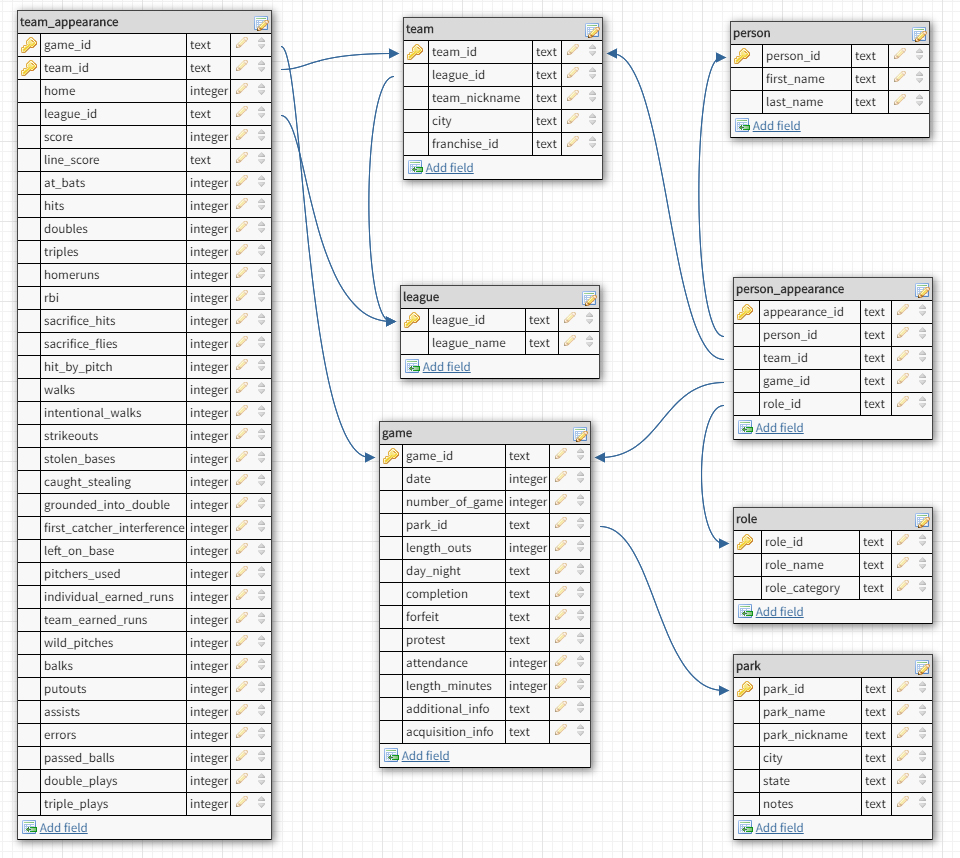

In [41]:
from IPython.display import Image
Image("schema.jpg")

### Table creation - no foreign keys

Now it is time to create the tables proper. We MUST begin with the tables which have no foreign keys, as these are the tables which other tables will refer to. These are:
- park
- league
- person
- role

In [26]:
cmnd1 = '''
CREATE TABLE IF NOT EXISTS park (
    park_id TEXT PRIMARY KEY,
    park_name TEXT,
    park_nickname TEXT,
    city TEXT,
    state TEXT,
    notes TEXT
);
'''
cmnd2 = '''
INSERT OR IGNORE INTO park
SELECT 
    park_id, 
    name, 
    aka, 
    city, 
    state, 
    notes
FROM park_codes;
'''
query = '''
SELECT * FROM park LIMIT 5
'''

run_command(cmnd1)
run_command(cmnd2)
run_query(query)

,park_id,park_name,park_nickname,city,state,notes
0,ALB01,Riverside Park,None,Albany,NY,TRN:9/11/80;6/15&9/10/1881;5/16-5/18&5/30/1882
1,ALT01,Columbia Park,None,Altoona,PA,None
2,ANA01,Angel Stadium of Anaheim,Edison Field; Anaheim Stadium,Anaheim,CA,None
3,ARL01,Arlington Stadium,None,Arlington,TX,None
4,ARL02,Rangers Ballpark in Arlington,The Ballpark in Arlington; Ameriquest Fl,Arlington,TX,None


The league table is slightly trickier. For starters, let's find the unique values for league_id. We'll then try to find info on what each id refers to and manually insert the results in a new table.

In [27]:
team_codes["league"].value_counts()

NL    45
AL    25
AA    24
UA    13
FL     9
PL     8
Name: league, dtype: int64

NL and AL are the [National League](https://en.wikipedia.org/wiki/National_League) and the [American League](https://en.wikipedia.org/wiki/American_League), the two leagues which constitute the modern MLB. Following the links we find that the National League is the oldest of the two, and that both historically competed with other leagues. These other leagues are in fact the other ones represented in our data - they are:
- AA: [American Association](https://en.wikipedia.org/wiki/American_Association_%2819th_century%29)
- UA: [Union Association](https://en.wikipedia.org/wiki/Union_Association)
- FL: [Federal League](https://en.wikipedia.org/wiki/Federal_League)
- PL: [Players' League](https://en.wikipedia.org/wiki/Players%27_League)

In [28]:
cmnd1 = '''
CREATE TABLE IF NOT EXISTS league (
    league_id TEXT PRIMARY KEY,
    league_name TEXT
);
'''
cmnd2 = '''
INSERT OR IGNORE INTO league
VALUES
    ("NL","National League"),
    ("AL","American League"),
    ("AA","American Association"),
    ("UA","Union Association"),
    ("FL","Federal League"),
    ("PL","Players' League");
'''
query = '''
SELECT * FROM league
'''

run_command(cmnd1)
run_command(cmnd2)
run_query(query)

,league_id,league_name
0,NL,National League
1,AL,American League
2,AA,American Association
3,UA,Union Association
4,FL,Federal League
5,PL,Players' League


In [29]:
cmnd1 = '''
CREATE TABLE IF NOT EXISTS person (
    person_id TEXT PRIMARY KEY,
    first_name TEXT,
    last_name TEXT
);
'''
cmnd2 = '''
INSERT OR IGNORE INTO person
SELECT 
    id, 
    first,
    last
FROM person_codes;
'''
query = '''
SELECT * FROM person LIMIT 5
'''

run_command(cmnd1)
run_command(cmnd2)
run_query(query)

,person_id,first_name,last_name
0,aardd001,David,Aardsma
1,aaroh101,Hank,Aaron
2,aarot101,Tommie,Aaron
3,aased001,Don,Aase
4,abada001,Andy,Abad


For the "role" table we'll be using a new data file called *appearance_type.csv*. Let's explore it a bit first.

In [30]:
appearance_type = pd.read_csv("appearance_type.csv",low_memory=False)

In [31]:
appearance_type.shape

(31, 3)

In [58]:
appearance_type

,appearance_type_id,name,category
0,O1,Batter 1,offense
1,O2,Batter 2,offense
2,O3,Batter 3,offense
3,O4,Batter 4,offense
4,O5,Batter 5,offense
5,O6,Batter 6,offense
6,O7,Batter 7,offense
7,O8,Batter 8,offense
8,O9,Batter 9,offense
9,D1,Pitcher,defense


In [33]:
appearance_type.tail()

,appearance_type_id,name,category
26,AWP,Winning Pitcher,award
27,ALP,Losing Pitcher,award
28,ASP,Saving Pitcher,award
29,AWB,Winning RBI Batter,award
30,PSP,Starting Pitcher,pitcher


In [34]:
appearance_type.dtypes

appearance_type_id    object
name                  object
category              object
dtype: object

In [35]:
with sqlite3.connect(db) as conn:
    conn.execute("DROP TABLE IF EXISTS appearance_type")
    appearance_type.to_sql("appearance_type",conn,index=False)

In [36]:
cmnd1 = '''
CREATE TABLE IF NOT EXISTS role (
    role_id TEXT PRIMARY KEY,
    role_name TEXT,
    role_category TEXT
);
'''
cmnd2 = '''
INSERT OR IGNORE INTO role
SELECT 
    appearance_type_id, 
    name, 
    category
FROM appearance_type;
'''
query = '''
SELECT * FROM role LIMIT 5
'''

run_command(cmnd1)
run_command(cmnd2)
run_query(query)

,role_id,role_name,role_category
0,O1,Batter 1,offense
1,O2,Batter 2,offense
2,O3,Batter 3,offense
3,O4,Batter 4,offense
4,O5,Batter 5,offense


### Table creation - foreign keys

We can now create and populate all other remaining tables. Remember that these had to be done after the others because they contain foreign keys which need to refer to existing tables. The remaining tables are:
- game
- team
- team_appearance
- person_appearance

In [37]:
cmnd1 = '''
CREATE TABLE IF NOT EXISTS game (
    game_id TEXT PRIMARY KEY,
    date INTEGER,
    number_of_game INTEGER,
    park_id TEXT,
    length_outs INTEGER,
    day_night TEXT,
    completion TEXT,
    forfeit TEXT,
    protest TEXT,
    attendance TEXT,
    length_minutes TEXT,
    additional_info TEXT,
    acquisition_info TEXT,
    FOREIGN KEY (park_id) REFERENCES park(park_id)
);
'''
cmnd2 = '''
INSERT OR IGNORE INTO game
SELECT 
    game_id, 
    date, 
    number_of_game,
    park_id,
    length_outs,
    day_night,
    completion,
    forefeit,
    protest,
    attendance,
    length_minutes,
    additional_info,
    acquisition_info
FROM game_log;
'''
query = '''
SELECT * FROM game LIMIT 5
'''

run_command(cmnd1)
run_command(cmnd2)
run_query(query)

,game_id,date,number_of_game,park_id,length_outs,day_night,completion,forfeit,protest,attendance,length_minutes,additional_info,acquisition_info
0,FW1187105040,18710504,0,FOR01,54,D,None,None,None,200.0,120.0,None,Y
1,WS3187105050,18710505,0,WAS01,54,D,None,None,None,5000.0,145.0,HTBF,Y
2,RC1187105060,18710506,0,RCK01,54,D,None,None,None,1000.0,140.0,None,Y
3,CH1187105080,18710508,0,CHI01,54,D,None,None,None,5000.0,150.0,None,Y
4,TRO187105090,18710509,0,TRO01,54,D,None,None,None,3250.0,145.0,HTBF,Y


In [38]:
cmnd1 = '''
CREATE TABLE IF NOT EXISTS team (
    team_id TEXT PRIMARY KEY,
    league_id TEXT,
    team_nickname TEXT,
    city TEXT,
    franchise_id TEXT,
    FOREIGN KEY (league_id) REFERENCES league(league_id)
);
'''
cmnd2 = '''
INSERT OR IGNORE INTO team
SELECT 
    team_id, 
    league, 
    nickname,
    city,
    franch_id
FROM team_codes;
'''
query = '''
SELECT * FROM team LIMIT 5
'''

run_command(cmnd1)
run_command(cmnd2)
run_query(query)

,team_id,league_id,team_nickname,city,franchise_id
0,ALT,UA,Mountain Cities,Altoona,ALT
1,ARI,NL,Diamondbacks,Arizona,ARI
2,BFN,NL,Bisons,Buffalo,BFN
3,BFP,PL,Bisons,Buffalo,BFP
4,BL1,None,Canaries,Baltimore,BL1


In [56]:
# The next table would require lots of typing - let's print out the database columns so we can copy and paste them.
query = '''SELECT sql FROM sqlite_master
WHERE name = "game_log"
  AND type = "table";'''
output = run_query(query)["sql"][0]
output = output.split(",")
output

['CREATE TABLE "game_log" (\n"date" INTEGER',
 '\n  "number_of_game" INTEGER',
 '\n  "day_of_week" TEXT',
 '\n  "v_name" TEXT',
 '\n  "v_league" TEXT',
 '\n  "v_game_number" INTEGER',
 '\n  "h_name" TEXT',
 '\n  "h_league" TEXT',
 '\n  "h_game_number" INTEGER',
 '\n  "v_score" INTEGER',
 '\n  "h_score" INTEGER',
 '\n  "length_outs" REAL',
 '\n  "day_night" TEXT',
 '\n  "completion" TEXT',
 '\n  "forefeit" TEXT',
 '\n  "protest" TEXT',
 '\n  "park_id" TEXT',
 '\n  "attendance" REAL',
 '\n  "length_minutes" REAL',
 '\n  "v_line_score" TEXT',
 '\n  "h_line_score" TEXT',
 '\n  "v_at_bats" REAL',
 '\n  "v_hits" REAL',
 '\n  "v_doubles" REAL',
 '\n  "v_triples" REAL',
 '\n  "v_homeruns" REAL',
 '\n  "v_rbi" REAL',
 '\n  "v_sacrifice_hits" REAL',
 '\n  "v_sacrifice_flies" REAL',
 '\n  "v_hit_by_pitch" REAL',
 '\n  "v_walks" REAL',
 '\n  "v_intentional_walks" REAL',
 '\n  "v_strikeouts" REAL',
 '\n  "v_stolen_bases" REAL',
 '\n  "v_caught_stealing" REAL',
 '\n  "v_grounded_into_double" REAL',


In [40]:
cmnd1 = '''
CREATE TABLE IF NOT EXISTS team_appearance (
    team_id TEXT,
    game_id TEXT,
    home BOOLEAN,
    league_id TEXT,
    score INTEGER,
    line_score TEXT,
    at_bats INTEGER,
    hits INTEGER,
    doubles INTEGER,
    triples INTEGER,
    homeruns INTEGER,
    rbi INTEGER,
    sacrifice_hits INTEGER,
    sacrifice_flies INTEGER,
    hit_by_pitch INTEGER,
    walks INTEGER,
    intentional_walks INTEGER,
    strikeouts INTEGER,
    stolen_bases INTEGER,
    caught_stealing INTEGER,
    grounded_into_double INTEGER,
    first_catcher_interference INTEGER,
    left_on_base INTEGER,
    pitchers_used INTEGER,
    individual_earned_runs INTEGER,
    team_earned_runs INTEGER,
    wild_pitches INTEGER,
    balks INTEGER,
    putouts INTEGER,
    assists INTEGER,
    errors INTEGER,
    passed_balls INTEGER,
    double_plays INTEGER,
    triple_plays INTEGER,
    PRIMARY KEY (team_id, game_id)
    FOREIGN KEY (team_id) REFERENCES team(team_id)
    FOREIGN KEY (game_id) REFERENCES game(game_id)
    FOREIGN KEY (league_id) REFERENCES league(league_id)
);
'''
cmnd2 = '''
INSERT OR IGNORE INTO team_appearance
SELECT 
    h_name,
    game_id,
    1 AS home,
    h_league,
    h_score,
    h_line_score,
    h_at_bats,
    h_hits,
    h_doubles,
    h_triples,
    h_homeruns,
    h_rbi,
    h_sacrifice_hits,
    h_sacrifice_flies,
    h_hit_by_pitch,
    h_walks,
    h_intentional_walks,
    h_strikeouts,
    h_stolen_bases,
    h_caught_stealing,
    h_grounded_into_double,
    h_first_catcher_interference,
    h_left_on_base,
    h_pitchers_used,
    h_individual_earned_runs,
    h_team_earned_runs,
    h_wild_pitches,
    h_balks,
    h_putouts,
    h_assists,
    h_errors,
    h_passed_balls,
    h_double_plays,
    h_triple_plays
FROM game_log

UNION

SELECT
    v_name,
    game_id,
    0 AS home,
    v_league,
    v_score,
    v_line_score,
    v_at_bats,
    v_hits,
    v_doubles,
    v_triples,
    v_homeruns,
    v_rbi,
    v_sacrifice_hits,
    v_sacrifice_flies,
    v_hit_by_pitch,
    v_walks,
    v_intentional_walks,
    v_strikeouts,
    v_stolen_bases,
    v_caught_stealing,
    v_grounded_into_double,
    v_first_catcher_interference,
    v_left_on_base,
    v_pitchers_used,
    v_individual_earned_runs,
    v_team_earned_runs,
    v_wild_pitches,
    v_balks,
    v_putouts,
    v_assists,
    v_errors,
    v_passed_balls,
    v_double_plays,
    v_triple_plays
FROM game_log;
'''
query = '''
SELECT * FROM team_appearance 
ORDER BY game_id
LIMIT 10
'''

run_command(cmnd1)
run_command(cmnd2)
run_query(query)

,team_id,game_id,home,league_id,score,line_score,at_bats,hits,doubles,triples,homeruns,rbi,sacrifice_hits,sacrifice_flies,hit_by_pitch,walks,intentional_walks,strikeouts,stolen_bases,caught_stealing,grounded_into_double,first_catcher_interference,left_on_base,pitchers_used,individual_earned_runs,team_earned_runs,wild_pitches,balks,putouts,assists,errors,passed_balls,double_plays,triple_plays
0,CL1,18710504FW10,0,None,0,000000000,30,4,1,0,0,0,0,0,0,1,None,6,1,None,-1,None,4,1,1,1,0,0,27,9,0,3,0,0
1,FW1,18710504FW10,1,None,2,010010000,31,4,1,0,0,2,0,0,0,1,None,0,0,None,-1,None,3,1,0,0,0,0,27,3,3,1,1,0
2,BS1,18710505WS30,0,None,20,107000435,41,13,1,2,0,13,0,0,0,18,None,5,3,None,-1,None,12,1,6,6,1,0,27,13,10,1,2,0
3,WS3,18710505WS30,1,None,18,640113030,49,14,2,0,0,11,0,0,0,10,None,2,1,None,-1,None,14,1,7,7,0,0,27,20,10,2,3,0
4,CL1,18710506RC10,0,None,12,610020003,49,11,1,1,0,8,0,0,0,0,None,1,0,None,-1,None,10,1,0,0,2,0,27,12,8,5,0,0
5,RC1,18710506RC10,1,None,4,010020100,36,7,2,1,0,2,0,0,0,0,None,3,5,None,-1,None,5,1,3,3,1,0,27,12,13,3,0,0
6,CH1,18710508CH10,1,None,14,077000000,43,11,2,0,0,8,0,0,0,4,None,2,1,None,-1,None,6,1,4,4,0,0,27,14,7,2,0,0
7,CL1,18710508CH10,0,None,12,101403111,46,15,2,1,2,10,0,0,0,0,None,1,0,None,-1,None,7,1,6,6,0,0,27,15,11,6,0,0
8,BS1,18710509TRO0,0,None,9,000002232,46,17,4,1,0,6,0,0,0,2,None,0,1,None,-1,None,12,1,2,2,0,0,27,12,5,0,1,0
9,TRO,18710509TRO0,1,None,5,101003000,36,9,0,0,0,2,0,0,0,3,None,0,2,None,-1,None,7,1,3,3,1,0,27,11,7,3,0,0


The last table is the most difficult one. We can simply bruteforce it and write out all required combinations of columns, but there are 31 separate roles (including awards) so it would be good to automate the procedure a bit. We can try to use the .format() method to do so.

Note that both the saving pitcher award and the winning rbi batter award are given to the winning team, so the team_id can be selected accordingly.

In [93]:
cmnd0 = "DROP TABLE IF EXISTS person_appearance"
run_command(cmnd0) # A reset button for when errors are made in the following cells

cmnd1 = '''
CREATE TABLE IF NOT EXISTS person_appearance (
    appearance_id INTEGER PRIMARY KEY,
    person_id TEXT,
    team_id TEXT,
    game_id TEXT,
    role_id TEXT,
    FOREIGN KEY (person_id) REFERENCES person(person_id),
    FOREIGN KEY (team_id) REFERENCES team(team_id),
    FOREIGN KEY (game_id) REFERENCES game(game_id),
    FOREIGN KEY (role_id) REFERENCES role(role_id)
);
'''

run_command(cmnd1)

In [94]:
# Umpires first
pos = ["hp","1b","2b","3b","lf","rf"]
rol = ["UHP","U1B","U2B","U3B","ULF","URF"]

template = '''
INSERT OR IGNORE INTO person_appearance (
    person_id,
    team_id,
    game_id,
    role_id
)
SELECT
    [{0}_umpire_id],
    NULL,
    game_id,
    "{1}"
FROM game_log
WHERE [{0}_umpire_id] IS NOT NULL;
'''

for i in range(len(pos)):
    run_command(template.format(pos[i],rol[i]))

In [95]:
# Managers second
pos = ["v","h"]
rol = "MM"

template = '''
INSERT OR IGNORE INTO person_appearance (
    person_id,
    team_id,
    game_id,
    role_id
)
SELECT
    {0}_manager_id,
    {0}_name,
    game_id,
    "{1}"
FROM game_log
WHERE {0}_manager_id IS NOT NULL;
'''

for i in range(len(pos)):
    run_command(template.format(pos[i],rol))

In [96]:
# Awards third - no template here
cmnd = '''
INSERT OR IGNORE INTO person_appearance (
    person_id,
    team_id,
    game_id,
    role_id
)
SELECT
    winning_pitcher_id,
    CASE
        WHEN h_score > v_score THEN h_name
        ELSE v_name
        END,
    game_id,
    "AWP"
FROM game_log
WHERE winning_pitcher_id IS NOT NULL

UNION

SELECT
    losing_pitcher_id,
    CASE
        WHEN h_score < v_score THEN h_name
        ELSE v_name
        END,
    game_id,
    "ALP"
FROM game_log
WHERE losing_pitcher_id IS NOT NULL

UNION

SELECT
    saving_pitcher_id,
    CASE
        WHEN h_score > v_score THEN h_name
        ELSE v_name
        END,
    game_id,
    "ASP"
FROM game_log
WHERE saving_pitcher_id IS NOT NULL

UNION

SELECT
    winning_rbi_batter_id,
    CASE
        WHEN h_score > v_score THEN h_name
        ELSE v_name
        END,
    game_id,
    "AWB"
FROM game_log
WHERE winning_rbi_batter_id IS NOT NULL;
'''

run_command(cmnd)

In [97]:
# Starting pitchers fourth
pos = ["v","h"]
rol = "PSP"

template = '''
INSERT OR IGNORE INTO person_appearance (
    person_id,
    team_id,
    game_id,
    role_id
)
SELECT
    {0}_starting_pitcher_id,
    {0}_name,
    game_id,
    "{1}"
FROM game_log
WHERE {0}_starting_pitcher_id IS NOT NULL;
'''

for i in range(len(pos)):
    run_command(template.format(pos[i],rol))

The final bit will store the players themselves. The output here will be a bit different because each player has both an offensive and a defensive role in each game - therefore we will input each player twice, once per each role. 

The offensive role is given by the sequential number in the column name (1-9), while the defensive position is given by the integer value in the def_pos columns. Note that the latter contains values from 1 to 10, value 10 being described as "unknown position" in the role table.

In [98]:
# ...And finally the players
template = """
INSERT OR IGNORE INTO person_appearance (
    person_id,
    team_id,
    game_id,
    role_id
)
SELECT
    {vh}_player_{num}_id,
    {vh}_name,
    game_id,
    "O{num}"
FROM game_log
WHERE {vh}_player_{num}_id IS NOT NULL

UNION

SELECT
    {vh}_player_{num}_id,
    {vh}_name,
    game_id,
    "D" || CAST({vh}_player_{num}_def_pos AS INT)
FROM game_log
WHERE {vh}_player_{num}_id IS NOT NULL;
"""

for vh in ["v","h"]:
    for num in range(1,10):      # This dictionary approach was necessary because including numerical objects as parts of
        query_vars = {           # the column names isn't very sql-friendly
            "vh": vh,
            "num": num
        }
        run_command(template.format(**query_vars))

Let's output a sample game roster to check that everything is in order. Let's pick the most recent game in the database.

In [99]:
query = '''
SELECT
    pa.*,
    rl.role_name,
    rl.role_category
FROM person_appearance pa
INNER JOIN role rl ON rl.role_id == pa.role_id
WHERE pa.game_id == (SELECT MAX(game_id) FROM person_appearance)
ORDER BY team_id, role_id
'''

run_query(query)

,appearance_id,person_id,team_id,game_id,role_id,role_name,role_category
0,318928,porta901,None,20161002WAS0,U1B,First Base,umpire
1,407468,onorb901,None,20161002WAS0,U2B,Second Base,umpire
2,524191,kellj901,None,20161002WAS0,U3B,Third Base,umpire
3,171888,tumpj901,None,20161002WAS0,UHP,Home Plate,umpire
4,908963,brica001,MIA,20161002WAS0,ALP,Losing Pitcher,award
5,4036555,koeht001,MIA,20161002WAS0,D1,Pitcher,defense
6,2174373,telit001,MIA,20161002WAS0,D2,Catcher,defense
7,2796607,bourj002,MIA,20161002WAS0,D3,1st Base,defense
8,1751989,gordd002,MIA,20161002WAS0,D4,2nd Base,defense
9,2405145,pradm001,MIA,20161002WAS0,D5,3rd Base,defense


## Original tables removal
Our newly constructed database is finished! The only thing left to do is to remove the original tables - now that we've redistributed all data into new tables we don't need the old ones anymore.

In [101]:
show_tables()

,name,type
0,park,table
1,league,table
2,person,table
3,role,table
4,team,table
5,team_appearance,table
6,game,table
7,game_log,table
8,park_codes,table
9,person_codes,table


In [102]:
tables = ["game_log","park_codes","person_codes","team_codes","appearance_type"]

for t in tables:
    cmnd = "DROP TABLE {}".format(t)
    run_command(cmnd)
    
show_tables()

,name,type
0,park,table
1,league,table
2,person,table
3,role,table
4,team,table
5,team_appearance,table
6,game,table
7,person_appearance,table
